# Required libraries

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import sys
import os

## Database Connection and Data Loading

In [26]:
# Add project path
sys.path.append(os.path.abspath(".."))

# Import database connection module
from database.db_connection import DatabaseConnector

# Handle database connection
try:
    db_connector = DatabaseConnector()
    engine = db_connector.get_engine()
except Exception as e:
    print(f"Error connecting to the database: {e}")
    sys.exit(1)  # Exit on connection failure

# Load data from the database
try:
    forecast_df = pd.read_sql("SELECT * FROM historical_forecast;", engine)
    weather_df = pd.read_sql("SELECT * FROM historical_weather;", engine)
except Exception as e:
    print(f"Error loading data from the database: {e}")
    sys.exit(1)  # Exit on data loading failure

# Feature Engineering: Extract month from datetime

In [27]:
weather_df['month'] = weather_df['datetime'].dt.month

# Define features (X) and target (y) and split data into training and testing sets

In [28]:
X = weather_df[['month', 'relative_humidity_2m', 'wind_speed_10m']]  # Select relevant features
y = weather_df['temperature_2m']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models

In [29]:
linear_model = LinearRegression()
rf_model = RandomForestRegressor(random_state=42)

# Train models

In [30]:
linear_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

# Make predictions

In [31]:
y_pred_linear = linear_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)

# Evaluate models

In [32]:
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Print evaluation metrics

In [33]:
print("=== Linear Regression ===")
print(f"Mean Squared Error (MSE): {mse_linear:.2f}")
print(f"R²: {r2_linear:.2f}")

print("\n=== Random Forest Regressor ===")
print(f"Mean Squared Error (MSE): {mse_rf:.2f}")
print(f"R²: {r2_rf:.2f}")

=== Linear Regression ===
Mean Squared Error (MSE): 41.62
R²: 0.33

=== Random Forest Regressor ===
Mean Squared Error (MSE): 10.44
R²: 0.83


# Feature importance from Random Forest

In [34]:
feature_importances = rf_model.feature_importances_
print("\nFeature Importances (Random Forest):")
for feature, importance in zip(X.columns, feature_importances):
    print(f"{feature}: {importance:.2f}")


Feature Importances (Random Forest):
month: 0.66
relative_humidity_2m: 0.24
wind_speed_10m: 0.10


# Visualization of predictions

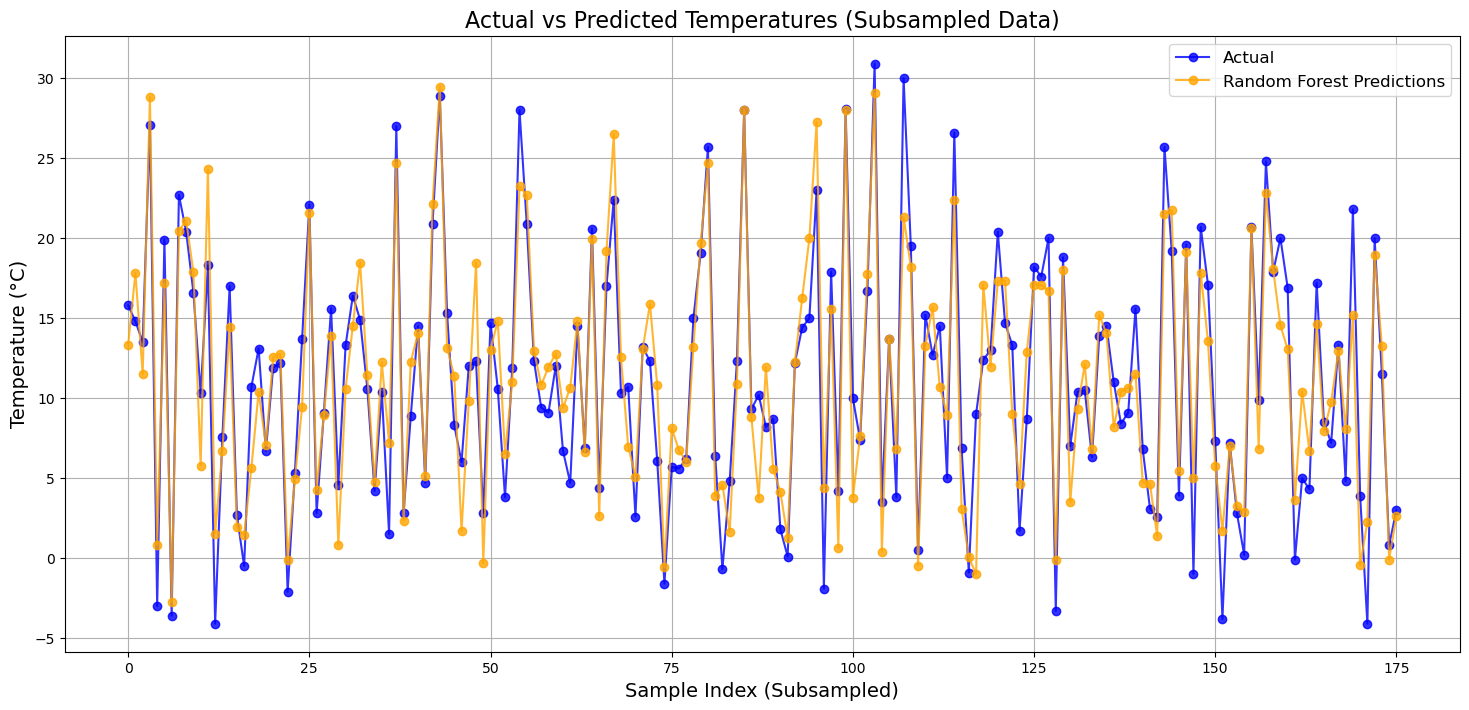

In [35]:
# Subsample the data for visualization
subsample_indices = range(0, len(y_test), 10)  # Take every 10th point
y_test_subsampled = y_test.iloc[subsample_indices]
y_pred_rf_subsampled = y_pred_rf[subsample_indices]

plt.figure(figsize=(18, 8))  # Larger plot size for clarity
plt.plot(y_test_subsampled.values, label='Actual', color='blue', alpha=0.8, linestyle='-', marker='o')
plt.plot(y_pred_rf_subsampled, label='Random Forest Predictions', color='orange', alpha=0.8, linestyle='-', marker='o')
plt.title("Actual vs Predicted Temperatures (Subsampled Data)", fontsize=16)
plt.xlabel("Sample Index (Subsampled)", fontsize=14)
plt.ylabel("Temperature (°C)", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)  # Add a grid for better readability
plt.show()


## Note for visualization of predictions:

In the visualization of the actual versus predicted temperatures using the Random Forest model, the initial plot was densely packed, making it challenging to discern meaningful trends and differences between the two datasets.
We subsampled the data, selecting every 10th point from the dataset. This significantly reduced the clutter and improved readability.

## Interpretation:

Linear Regression: Performs well for simple linear relationships but may struggle to capture more complex patterns in the data, as reflected in the R² score.

Random Forest Regressor: Demonstrates better performance by capturing non-linear interactions between variables, with a lower MSE and higher R².

Feature importance analysis reveals which factors most significantly influence temperature predictions, offering valuable insights for future improvements.